In [21]:
import pandas as pd


data_path = 'abalone.data'
ab_data = pd.read_csv(data_path, sep=',', header=None)
ab_data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Rings' ]

In [22]:
ab_data

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [23]:
import seaborn as sns

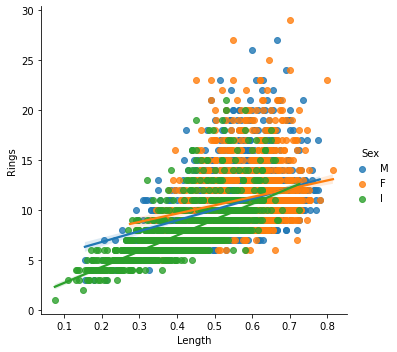

In [24]:
lenvrings = sns.lmplot(x="Length",y="Rings", hue="Sex", data=ab_data).set_axis_labels("Length", "Rings")

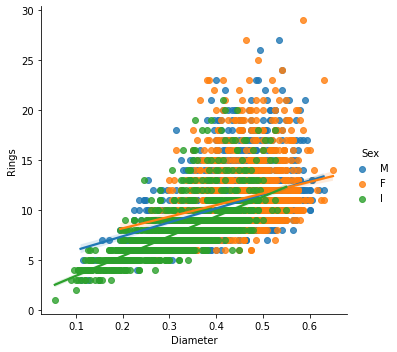

In [25]:
diametervrings = sns.lmplot(x="Diameter",y="Rings", hue="Sex", data=ab_data).set_axis_labels("Diameter", "Rings")

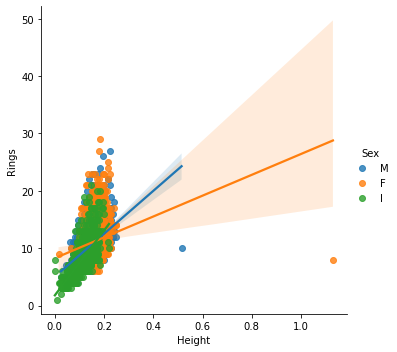

In [26]:
heightvrings = sns.lmplot(x="Height",y="Rings", hue="Sex", data=ab_data).set_axis_labels("Height", "Rings")

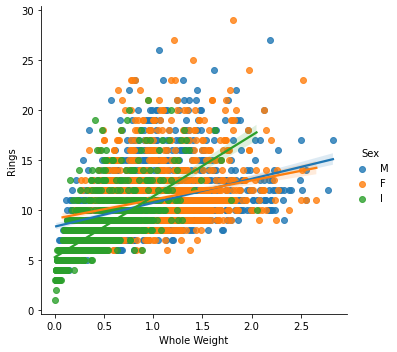

In [27]:
wholeweightvrings = sns.lmplot(x="Whole Weight",y="Rings", hue="Sex", data=ab_data).set_axis_labels("Whole Weight", "Rings")

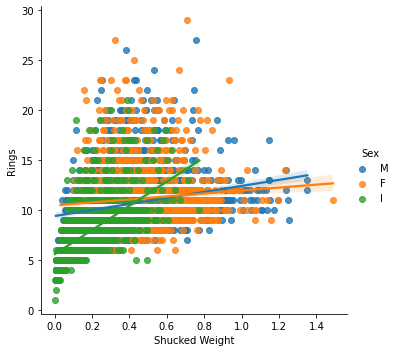

In [28]:
shuckedweightvrings = sns.lmplot(x="Shucked Weight",y="Rings", hue="Sex", data=ab_data).set_axis_labels("Shucked Weight", "Rings")

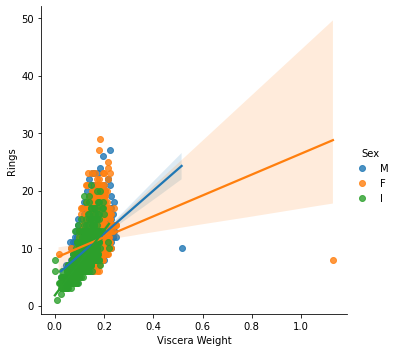

In [29]:
visceraweightvrings = sns.lmplot(x="Height",y="Rings", hue="Sex", data=ab_data).set_axis_labels("Viscera Weight", "Rings")

In [ ]:
shellweightvrings = sns.lmplot(x="Height",y="Rings", hue="Sex", data=ab_data).set_axis_labels("Shell Weight", "Rings")

Potential Ways to Predict Rings

1. Multivariate Regression using all vars except sex
2. Neural network (need to figure out what type and node placement)
3. Average of linear regressions (create linear regression using each numerical value, then average the approximate rings)